## Post inital model notebook re-review

Taking a second pass through the data now with additional feature engineering. Doing this on a new notebook to compare results to the old one.

NOTE: Only differences from the 1st notebook will have text explanations to make them easy to spot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


pd.set_option('display.max_rows', 23)

In [3]:
df = pd.read_csv('C:/Users/ps3ma/Capstone/Capstone_final - Copy/Actual_Capstone/Capstone_grouped_df_take_2.csv')

df

,game_id,winner_play,shotgun,no_huddle,qb_scramble,air_yards,yards_after_catch,first_down_rush,first_down_pass,third_down_converted,...,field_goal,pass,run,left,middle,end,guard,pass/run_ratio,air_yards_per_dropback,YAC_per_dropback
0,2009091000,0,40,14,1,436.0,136.0,1.0,19.0,4.0,...,1,49,23,21,10,3,9,2.130435,8.897959,2.775510
1,2009091000,1,16,0,0,266.0,67.0,2.0,13.0,4.0,...,4,34,25,13,3,6,7,1.360000,7.823529,1.970588
2,2009091300,0,17,0,0,321.0,126.0,3.0,15.0,6.0,...,4,38,24,10,10,4,0,1.583333,8.447368,3.315789
3,2009091300,1,21,0,0,159.0,88.0,4.0,11.0,4.0,...,0,33,22,14,5,9,0,1.500000,4.818182,2.666667
4,2009091301,0,21,43,7,434.0,126.0,11.0,20.0,10.0,...,2,44,41,16,12,11,12,1.073171,9.863636,2.863636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,2018121610,1,35,7,0,334.0,129.0,7.0,9.0,3.0,...,1,37,19,5,14,0,6,1.947368,9.027027,3.486486
5048,2018121611,0,47,13,2,356.0,188.0,5.0,18.0,4.0,...,3,55,18,21,9,7,3,3.055556,6.472727,3.418182
5049,2018121611,1,56,1,1,234.0,121.0,7.0,9.0,4.0,...,4,31,30,8,8,3,1,1.033333,7.548387,3.903226
5050,2018121700,0,45,11,2,168.0,103.0,5.0,7.0,7.0,...,0,33,23,6,7,2,6,1.434783,5.090909,3.121212


In [4]:
df.reset_index(inplace=True)
df.set_index('game_id')

,index,winner_play,shotgun,no_huddle,qb_scramble,air_yards,yards_after_catch,first_down_rush,first_down_pass,third_down_converted,...,field_goal,pass,run,left,middle,end,guard,pass/run_ratio,air_yards_per_dropback,YAC_per_dropback
game_id,,,,,,,,,,,,,,,,,,,,,
2009091000,0,0,40,14,1,436.0,136.0,1.0,19.0,4.0,...,1,49,23,21,10,3,9,2.130435,8.897959,2.775510
2009091000,1,1,16,0,0,266.0,67.0,2.0,13.0,4.0,...,4,34,25,13,3,6,7,1.360000,7.823529,1.970588
2009091300,2,0,17,0,0,321.0,126.0,3.0,15.0,6.0,...,4,38,24,10,10,4,0,1.583333,8.447368,3.315789
2009091300,3,1,21,0,0,159.0,88.0,4.0,11.0,4.0,...,0,33,22,14,5,9,0,1.500000,4.818182,2.666667
2009091301,4,0,21,43,7,434.0,126.0,11.0,20.0,10.0,...,2,44,41,16,12,11,12,1.073171,9.863636,2.863636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018121610,5047,1,35,7,0,334.0,129.0,7.0,9.0,3.0,...,1,37,19,5,14,0,6,1.947368,9.027027,3.486486
2018121611,5048,0,47,13,2,356.0,188.0,5.0,18.0,4.0,...,3,55,18,21,9,7,3,3.055556,6.472727,3.418182
2018121611,5049,1,56,1,1,234.0,121.0,7.0,9.0,4.0,...,4,31,30,8,8,3,1,1.033333,7.548387,3.903226


--------

In [5]:
binary_counts = df['winner_play'].value_counts()

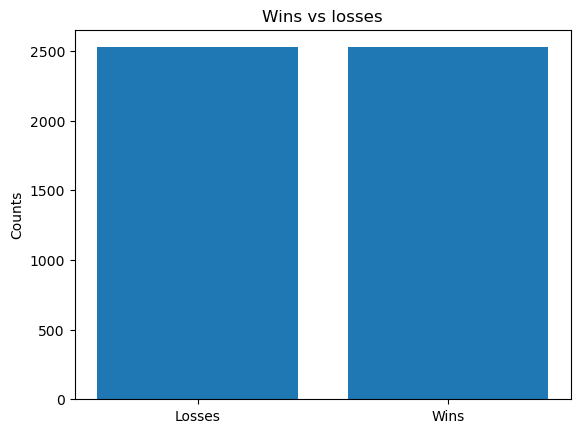

In [6]:
plt.figure()

plt.bar(['Losses','Wins'], binary_counts.values)
plt.ylabel('Counts')
plt.title('Wins vs losses')

plt.show()

As expected when taking 2 teams per game there is no class imbalance whatsoever

### One last visual before modeling

Now that we've previously seen our models value 1st down playcalls, I wanted to take a look this time to see if anything stood out when visualizing this finding.

In [7]:
first_down_play_df = df[['winner_play', 'first_down_pass', 'first_down_rush']]

In [8]:
first_down_play_df['winner_run_on_1st'] = np.where(first_down_play_df['winner_play'] == 1, first_down_play_df['first_down_rush'], 0)
first_down_play_df['loser_run_on_1st'] = np.where(first_down_play_df['winner_play'] == 0, first_down_play_df['first_down_rush'], 0)
first_down_play_df['winner_pass_on_1st'] = np.where(first_down_play_df['winner_play'] == 1, first_down_play_df['first_down_pass'], 0)
first_down_play_df['loser_pass_on_1st'] = np.where(first_down_play_df['winner_play'] == 0, first_down_play_df['first_down_pass'], 0)

C:\Users\ps3ma\AppData\Local\Temp\ipykernel_31736\874298638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_down_play_df['winner_run_on_1st'] = np.where(first_down_play_df['winner_play'] == 1, first_down_play_df['first_down_rush'], 0)
C:\Users\ps3ma\AppData\Local\Temp\ipykernel_31736\874298638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_down_play_df['loser_run_on_1st'] = np.where(first_down_play_df['winner_play'] == 0, first_down_play_df['first_down_rush'], 0)
C:\Users\ps3ma\AppData\

In [9]:
first_down_play_df = first_down_play_df.drop(columns=['winner_play','first_down_pass', 'first_down_rush'])

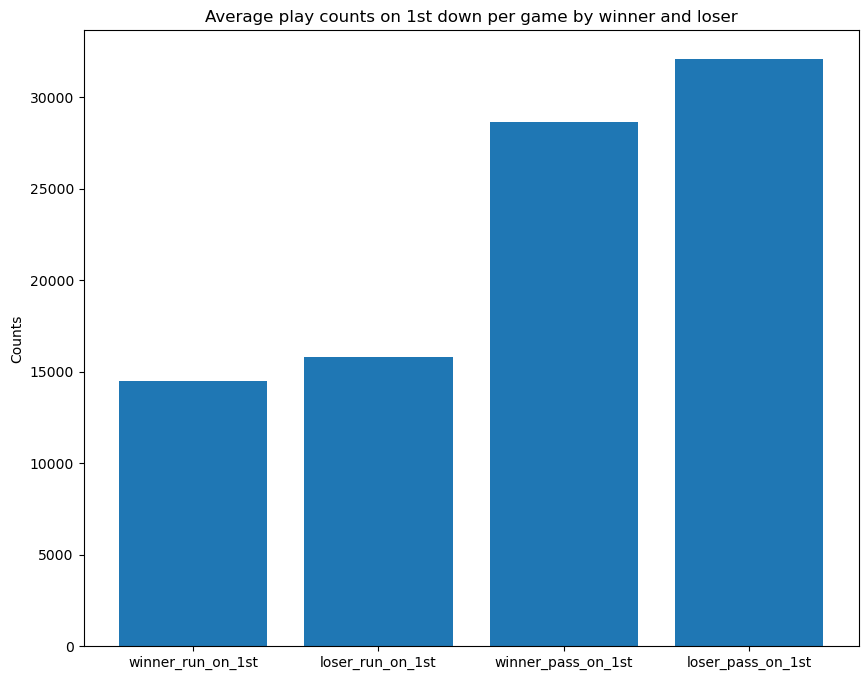

In [10]:
plt.figure(figsize=(10,8))

plt.bar(first_down_play_df.columns, first_down_play_df.sum())
plt.ylabel('Counts')
plt.title('Average play counts on 1st down per game by winner and loser')

plt.show()

Ultimately a similar finding to the 1st view, losing teams had a higher count for total 1st downs than winning teams.

---------

## Logistic Regression

In [11]:
x = df.drop(columns = ['winner_play', 'game_id', 'index','third_down_converted','third_down_failed','fourth_down_converted', 'fourth_down_failed','air_yards', 'yards_after_catch'])
y = df['winner_play']
# Dropping additional excess columns while setting the x_values

x_remainder, x_test, y_remainder, y_test = \
    train_test_split(x, y, test_size = 0.2,
                     random_state=5)

In [12]:
x_train, x_val, y_train, y_val = \
    train_test_split(x_remainder, y_remainder, test_size = 0.3,
                     random_state=5)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


estimators = [('scaler', StandardScaler()),
              ('model', LogisticRegression())]

pipe = Pipeline(estimators)

In [14]:
params = {'model__C':[0.01, 0.1, 1, 5, 10, 25, 50, 100]}

gridSearch = GridSearchCV(pipe, params, cv= 5)

fitGrid = gridSearch.fit(x_train,y_train)

In [15]:
gridSearch.best_params_

{'model__C': 0.01}

In [16]:
params = {'model__C':[.001, .005, .01, .005]}

gridSearch = GridSearchCV(pipe, params, cv= 5)

fitGrid = gridSearch.fit(x_train,y_train)

In [17]:
gridSearch.best_params_

{'model__C': 0.001}

In [18]:
logreg = LogisticRegression(C = .001, solver = 'liblinear', random_state = 1)
logreg.fit(x_train,y_train);

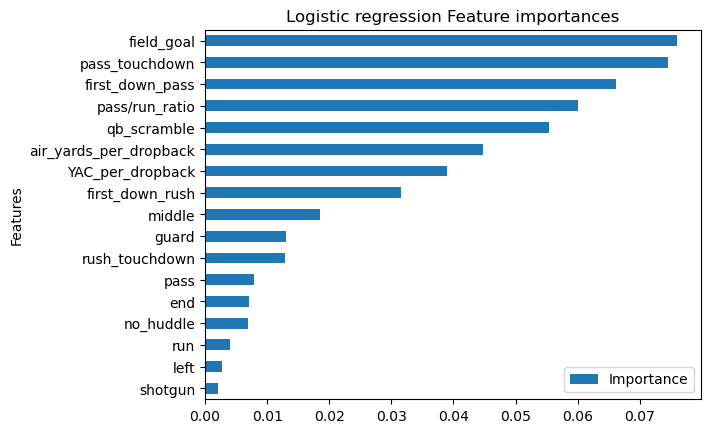

In [19]:
coeffs = logreg.coef_
avg_importance = np.mean(np.abs(coeffs), axis=0)

feature_importance = pd.DataFrame({'Features': x.columns, 'Importance': avg_importance}).sort_values('Importance', ascending=True)
feature_importance.plot(x='Features', y='Importance', kind='barh', title = 'Logistic regression Feature importances');

On the second pass at the logistic regression we see the former 2 leaders of field goals and scrambles moved down in favor of the newly added pass/run ratio statistic and pass touchdowns. This may be indicating that a more aggressive, passing style of play is more effective than a conservative style of play, however, it will be important to view the other models to confirm this new finding.

We do see the former leaders drop quite a bit, which something important to keep an eye on with the upcoming models.

In [20]:
logreg.score(x_train, y_train)

0.5859264497878359

In [21]:
print(f' The accuracy of the model on the validation set is: {logreg.score(x_val,y_val)}\n The accuracy of the model on the test set is:       {logreg.score(x_test,y_test)}')

 The accuracy of the model on the validation set is: 0.5548227535037098
 The accuracy of the model on the test set is:       0.5707220573689417


Logistic regression scores remained about the same with new data

-------

## Decision Tree

In [22]:
dt_estimators = [('scaler', StandardScaler()),
              ('model', DecisionTreeClassifier())]

dt_pipe = Pipeline(dt_estimators)

In [23]:
dt_params = {'model': [DecisionTreeClassifier()],
             'model__max_depth': [2,3,4,5,6],
             'model__min_samples_leaf': [2,3,4,5,6,7]}

In [24]:
dt_grid = GridSearchCV(dt_pipe, dt_params, cv = 5, verbose = 3)
dt_grid_fit = dt_grid.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=2;, score=0.549 total time=   0.0s
[CV 2/5] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=2;, score=0.518 total time=   0.0s
[CV 3/5] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=2;, score=0.572 total time=   0.0s
[CV 4/5] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=2;, score=0.529 total time=   0.0s
[CV 5/5] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=2;, score=0.538 total time=   0.0s
[CV 1/5] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=3;, score=0.549 total time=   0.0s
[CV 2/5] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=3;, score=0.518 total time=   0.0s
[CV 3/5] END model=DecisionTreeClassifier(), model__max_depth=2, model

[CV 3/5] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=3;, score=0.585 total time=   0.0s
[CV 4/5] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=3;, score=0.543 total time=   0.0s
[CV 5/5] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=3;, score=0.570 total time=   0.0s
[CV 1/5] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=4;, score=0.572 total time=   0.0s
[CV 2/5] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=4;, score=0.542 total time=   0.0s
[CV 3/5] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=4;, score=0.583 total time=   0.0s
[CV 4/5] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=4;, score=0.543 total time=   0.0s
[CV 5/5] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=4;, score=0.570 total time=   0.0s
[CV 1/5]

[CV 4/5] END model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=5;, score=0.503 total time=   0.0s
[CV 5/5] END model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=5;, score=0.584 total time=   0.0s
[CV 1/5] END model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=6;, score=0.555 total time=   0.0s
[CV 2/5] END model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=6;, score=0.585 total time=   0.0s
[CV 3/5] END model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=6;, score=0.557 total time=   0.0s
[CV 4/5] END model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=6;, score=0.504 total time=   0.0s
[CV 5/5] END model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=6;, score=0.584 total time=   0.0s
[CV 1/5] END model=DecisionTreeClassifier(), model__max_depth=6, model__min_samples_leaf=7;, score=0.555 total time=   0.0s
[CV 2/5]

In [25]:
dt_grid_fit.best_params_

{'model': DecisionTreeClassifier(max_depth=4, min_samples_leaf=2),
 'model__max_depth': 4,
 'model__min_samples_leaf': 2}

In [26]:
dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 2, random_state = 1)
dt.fit(x_train,y_train)

dt_pred = dt.predict(x_val)
dt_val_acc = accuracy_score(y_val,dt_pred)

dt_test_pred = dt.predict(x_test)
dt_test_acc = accuracy_score(y_test,dt_test_pred)

print(f' The accuracy of the model on the validation set is {dt_val_acc}\n The accuracy of the model on the test set is {dt_test_acc}')

 The accuracy of the model on the validation set is 0.5671887881286067
 The accuracy of the model on the test set is 0.5687438180019783


DecisionTree lowered accuracy with new data

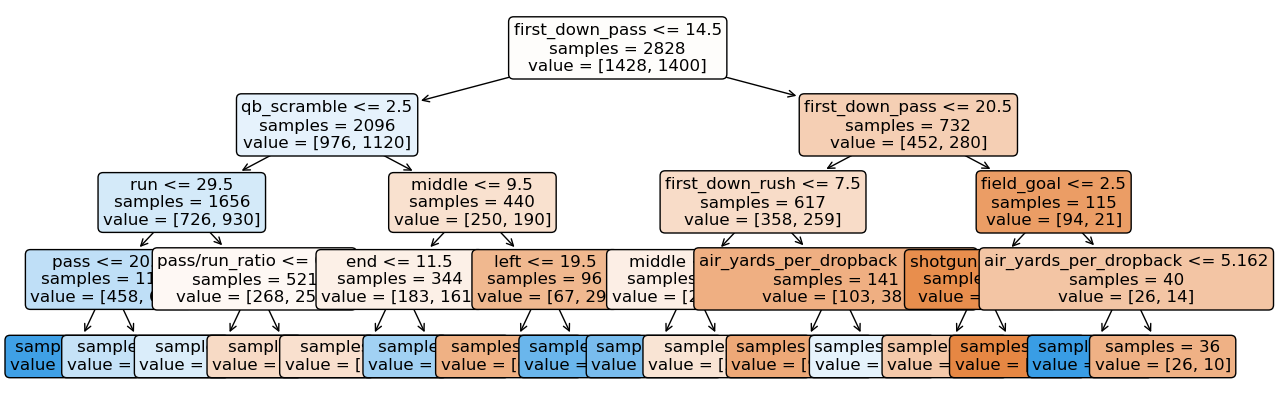

In [27]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(15,5))


plot_tree(dt, 
          feature_names=x.columns, 
          rounded=True,
          impurity=False,
          filled=True,
          fontsize=12);

The decision tree, looks almost identical to the origional models with first down pass being 2 of the top 3 features paired along with QB scrambles. It will be important to see if the XGBoost model is similar to this making the new logistic regression an outlier, or more similar to the logreg requiring more investigation.

-------

## XGBoost

In [28]:
import xgboost as xgb

C:\Users\ps3ma\anaconda3\lib\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [29]:
xg_params = {'learning_rate':[.05, .5, 1, 5, 10],
             'max_depth' : [2, 5, 10, 50],
             'n_estimators' : [100, 200, 500]}

gridSearch = GridSearchCV(xgb.XGBClassifier(), param_grid= xg_params, cv= 5, verbose = 3)


xg_fitGrid = gridSearch.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.588 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.551 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.624 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.563 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.579 total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=200;, score=0.588 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=2, n_estimators=200;, score=0.562 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=2, n_estimators=200;, score=0.615 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=2, n_estimators=200;, score=0.579 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=200;, score=0.5

[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=500;, score=0.567 total time=   0.3s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=500;, score=0.551 total time=   0.3s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=500;, score=0.557 total time=   0.3s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=500;, score=0.550 total time=   0.5s
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=500;, score=0.554 total time=   0.5s
[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.572 total time=   0.1s
[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.557 total time=   0.2s
[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.578 total time=   0.1s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.526 total time=   0.1s
[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.566 total time=   0.1s
[CV 1/5] END learning_rate=0.5, max_depth=10,

[CV 3/5] END learning_rate=1, max_depth=50, n_estimators=200;, score=0.578 total time=   0.1s
[CV 4/5] END learning_rate=1, max_depth=50, n_estimators=200;, score=0.552 total time=   0.1s
[CV 5/5] END learning_rate=1, max_depth=50, n_estimators=200;, score=0.586 total time=   0.1s
[CV 1/5] END learning_rate=1, max_depth=50, n_estimators=500;, score=0.553 total time=   0.3s
[CV 2/5] END learning_rate=1, max_depth=50, n_estimators=500;, score=0.519 total time=   0.3s
[CV 3/5] END learning_rate=1, max_depth=50, n_estimators=500;, score=0.581 total time=   0.3s
[CV 4/5] END learning_rate=1, max_depth=50, n_estimators=500;, score=0.556 total time=   0.3s
[CV 5/5] END learning_rate=1, max_depth=50, n_estimators=500;, score=0.573 total time=   0.3s
[CV 1/5] END learning_rate=5, max_depth=2, n_estimators=100;, score=0.495 total time=   0.0s
[CV 2/5] END learning_rate=5, max_depth=2, n_estimators=100;, score=0.495 total time=   0.0s
[CV 3/5] END learning_rate=5, max_depth=2, n_estimators=100;, 

[CV 3/5] END learning_rate=10, max_depth=5, n_estimators=200;, score=0.505 total time=   0.0s
[CV 4/5] END learning_rate=10, max_depth=5, n_estimators=200;, score=0.504 total time=   0.0s
[CV 5/5] END learning_rate=10, max_depth=5, n_estimators=200;, score=0.496 total time=   0.0s
[CV 1/5] END learning_rate=10, max_depth=5, n_estimators=500;, score=0.493 total time=   0.0s
[CV 2/5] END learning_rate=10, max_depth=5, n_estimators=500;, score=0.505 total time=   0.0s
[CV 3/5] END learning_rate=10, max_depth=5, n_estimators=500;, score=0.507 total time=   0.0s
[CV 4/5] END learning_rate=10, max_depth=5, n_estimators=500;, score=0.504 total time=   0.0s
[CV 5/5] END learning_rate=10, max_depth=5, n_estimators=500;, score=0.496 total time=   0.0s
[CV 1/5] END learning_rate=10, max_depth=10, n_estimators=100;, score=0.505 total time=   0.0s
[CV 2/5] END learning_rate=10, max_depth=10, n_estimators=100;, score=0.495 total time=   0.0s
[CV 3/5] END learning_rate=10, max_depth=10, n_estimators=

In [30]:
xg_fitGrid.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 200}

In [31]:
xg_params = {'learning_rate':[.0005, .005, .05, .1],
             'max_depth' : [2, 3],
             'n_estimators' : [150, 175, 200, 250, 300, 350]}

gridSearch = GridSearchCV(xgb.XGBClassifier(), param_grid= xg_params, cv= 5, verbose = 3)

xg_fitGrid = gridSearch.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.0005, max_depth=2, n_estimators=150;, score=0.569 total time=   0.0s
[CV 2/5] END learning_rate=0.0005, max_depth=2, n_estimators=150;, score=0.518 total time=   0.0s
[CV 3/5] END learning_rate=0.0005, max_depth=2, n_estimators=150;, score=0.587 total time=   0.0s
[CV 4/5] END learning_rate=0.0005, max_depth=2, n_estimators=150;, score=0.547 total time=   0.0s
[CV 5/5] END learning_rate=0.0005, max_depth=2, n_estimators=150;, score=0.556 total time=   0.0s
[CV 1/5] END learning_rate=0.0005, max_depth=2, n_estimators=175;, score=0.569 total time=   0.0s
[CV 2/5] END learning_rate=0.0005, max_depth=2, n_estimators=175;, score=0.518 total time=   0.0s
[CV 3/5] END learning_rate=0.0005, max_depth=2, n_estimators=175;, score=0.585 total time=   0.0s
[CV 4/5] END learning_rate=0.0005, max_depth=2, n_estimators=175;, score=0.547 total time=   0.0s
[CV 5/5] END learning_rate=0.0005, max_depth=2, n_estima

[CV 1/5] END learning_rate=0.005, max_depth=2, n_estimators=350;, score=0.595 total time=   0.1s
[CV 2/5] END learning_rate=0.005, max_depth=2, n_estimators=350;, score=0.541 total time=   0.0s
[CV 3/5] END learning_rate=0.005, max_depth=2, n_estimators=350;, score=0.622 total time=   0.0s
[CV 4/5] END learning_rate=0.005, max_depth=2, n_estimators=350;, score=0.554 total time=   0.0s
[CV 5/5] END learning_rate=0.005, max_depth=2, n_estimators=350;, score=0.582 total time=   0.0s
[CV 1/5] END learning_rate=0.005, max_depth=3, n_estimators=150;, score=0.576 total time=   0.0s
[CV 2/5] END learning_rate=0.005, max_depth=3, n_estimators=150;, score=0.544 total time=   0.0s
[CV 3/5] END learning_rate=0.005, max_depth=3, n_estimators=150;, score=0.620 total time=   0.0s
[CV 4/5] END learning_rate=0.005, max_depth=3, n_estimators=150;, score=0.550 total time=   0.0s
[CV 5/5] END learning_rate=0.005, max_depth=3, n_estimators=150;, score=0.581 total time=   0.0s
[CV 1/5] END learning_rate=0.0

[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=300;, score=0.592 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=300;, score=0.567 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=300;, score=0.611 total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=300;, score=0.568 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=300;, score=0.572 total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=350;, score=0.588 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=350;, score=0.562 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=350;, score=0.611 total time=   0.2s
[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=350;, score=0.565 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=350;, score=0.572 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_dept

In [32]:
xg_fitGrid.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 250}

In [33]:
xg_params = {'objective':'binary:logistic',
             'learning_rate': .1,
             'max_depth': 2,
             'n_estimators': 250,
             'seed': 1}

boost_train = xgb.DMatrix(x_train,label = y_train)
xg_model = xgb.train(xg_params,boost_train)

[13:52:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [34]:
xg_val = xgb.DMatrix(x_val)
xg_pred = xg_model.predict(xg_val)

In [35]:
xg_test = xgb.DMatrix(x_test)
xg_test_pred = xg_model.predict(xg_test)

In [36]:
accuracy = accuracy_score(y_val, xg_pred.round())
xg_test_acc = accuracy_score(y_test,xg_test_pred.round())

In [37]:
print(f' The accuracy of the model on the validation set i: {accuracy}\n The accuracy of the model on the test set is:      {xg_test_acc}')

 The accuracy of the model on the validation set i: 0.5655399835119538
 The accuracy of the model on the test set is:      0.5806132542037586


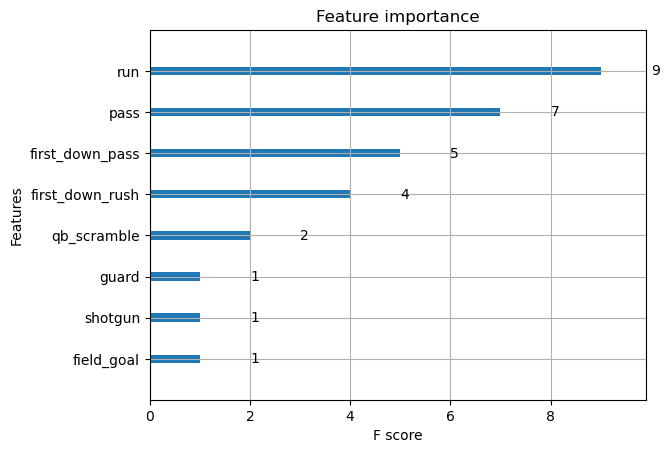

In [38]:
xgb.plot_importance(xg_model)
plt.show()

Now onto the final XGBoost we see a similar feature importance chart to the majority with first down pass/rush being the most important features once again with general run/pass decision making. While the new logistic regression did use the new features it appears that the decision tree and XGBoost didnt value them much at all and ultimately got similar results.

In [39]:
print(f'The final accuracy of the Logistic Regression model is: {logreg.score(x_test,y_test)}\nThe final accuracy of the Decision Tree model is:       {dt_test_acc}\nThe final accuracy of the XGBoost model is:             {xg_test_acc}')

The final accuracy of the Logistic Regression model is: 0.5707220573689417
The final accuracy of the Decision Tree model is:       0.5687438180019783
The final accuracy of the XGBoost model is:             0.5806132542037586


After running through the modelling process again with potentially impactful changes, the models preform slightly worse.
This variance is not large enough to be of significance, however, it is of note that they did not improve.

-------------------

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Creating a basic random forest

model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(x_train, y_train)

y_pred_rf = model_rf.predict(x_val)


y_pred_rf

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [102]:
# Setting hyperparameters and running gridsearch


RFparams = {
    'n_estimators': [100, 250],
    'max_depth': [2, 10],
    'min_samples_split': [2,10],
    'min_samples_leaf': [2, 10],
    'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=RFparams, cv=5)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 250}

In [103]:
RFparams = {
    'n_estimators': [250, 175],
    'max_depth': [10,5],
    'min_samples_split': [10, 5],
    'min_samples_leaf': [10, 5],
    'max_features': ['sqrt']}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=RFparams, cv=5)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 250}

In [104]:
GSmodel_rf = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=5, min_samples_split=10,
                                    n_estimators=250, random_state=1)
GSmodel_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, n_estimators=250, random_state=1)

In [105]:
print(f'The score on the training data is {GSmodel_rf.score(x_train,y_train).round(3)}%')


The score on the training data is 0.896%


In [106]:
print(f'The score on the test data is {GSmodel_rf.score(x_val,y_val).round(3)}%')


The score on the test data is 0.574%


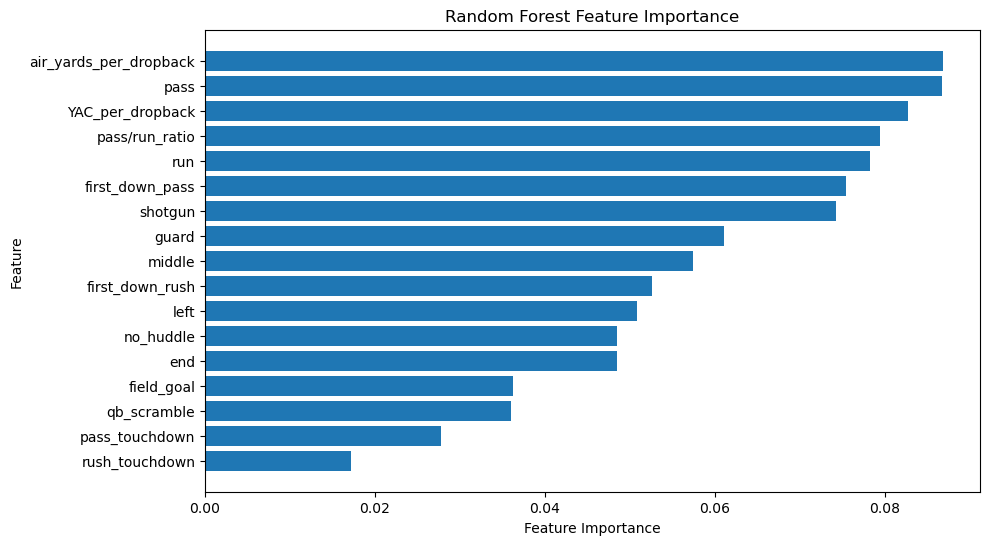

In [107]:
RFfeature_importances = GSmodel_rf.feature_importances_

# Grabbing feature names
RFfeature_names = list(x_train.columns) 

# Sorting features by importance
sorted_idx = RFfeature_importances.argsort()

plt.figure(figsize=(10, 6))

plt.barh(range(len(sorted_idx)), RFfeature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [RFfeature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')

plt.show()

run gap vs yds